<a href="https://colab.research.google.com/github/greght/Workshop-FastAi-Segmentation/blob/main/Fill_in_the_Blank_ImageSegmentation_fastAI_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

See the example at https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson3-camvid.ipynb

See the CSCAR workshop slides: https://docs.google.com/presentation/d/1fNLdRztw5u_k1JzTPfLYPUnqTbRiN_5wCrE9fL_t3BQ/edit?usp=sharing 

Dataset: http://www.josiahwang.com/dataset/leedsbutterfly/

>Josiah Wang, Katja Markert, and Mark Everingham\
>**Learning Models for Object Recognition from Natural Language Descriptions**\
>In *Proceedings of the 20th British Machine Vision Conference* (BMVC2009)



In [ ]:
# Note that this is set up for fastai v1
# Import fastai modules

import cv2
import os
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Download training set
!wget http://www.josiahwang.com/dataset/leedsbutterfly/leedsbutterfly_dataset_v1.0.zip

--2020-10-27 15:24:41--  http://www.josiahwang.com/dataset/leedsbutterfly/leedsbutterfly_dataset_v1.0.zip
Resolving www.josiahwang.com (www.josiahwang.com)... 143.95.240.28
Connecting to www.josiahwang.com (www.josiahwang.com)|143.95.240.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 476389461 (454M) [application/zip]
Saving to: ‘leedsbutterfly_dataset_v1.0.zip’

leedsbutterfly_data 100%[===================>] 454.32M  16.7MB/s    in 29s     

2020-10-27 15:25:11 (15.5 MB/s) - ‘leedsbutterfly_dataset_v1.0.zip’ saved [476389461/476389461]



In [ ]:
!unzip -q leedsbutterfly_dataset_v1.0.zip

In [ ]:
# Define where the images and masks (labels) are located
path_lbl = 
path_img = 

In [ ]:
# Rescale masks to 0 and 1 (instead of 0 and 255)
for filename in os.listdir(path_lbl):
  if filename.endswith(".png"):
    maskIn = cv2.imread(f'{path_lbl}/{filename}',cv2.IMREAD_UNCHANGED)
    maskOut = maskIn.copy()
    # Modify maskOut, as needed
    cv2.imwrite(f'{path_lbl}/{filename.split(".")[0]}_mask.png',maskOut)

In [ ]:
# Create lists of image and label files
fnames = get_image_files(path_img)
lbl_names = get_image_files(path_lbl)

In [ ]:
# Given the image filename, this function returns the mask filename
def get_mask_fn(x):
  return # Write the function

Image filename:  leedsbutterfly/images/0100028.png
Mask filename:  leedsbutterfly/segmentations/0100028_seg0_mask.png


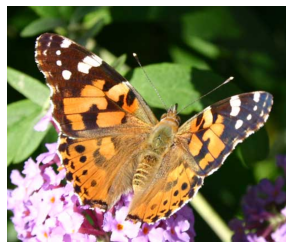

In [ ]:
# Show an image, as an example

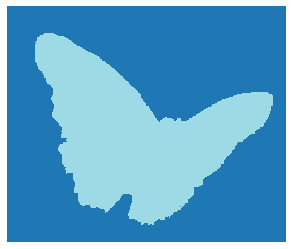

In [ ]:
# And now, show the corresponding mask

In [ ]:
from copy import deepcopy

# A simple function that masks/blanks out the background
def masked(img,mask):
  img2 = deepcopy(img)
  for i in range(img.shape[0]):
    ind = (mask.data[0] == 0)
    img2.data[i][ind] = 1
  return img2


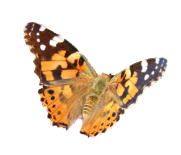

In [ ]:
# Apply the mask to the image (just for visualization)
masked(img,mask).show()

In [ ]:
# Give names to the label indices
codes = 

array(['Background', 'Butterfly'], dtype='<U10')

In [ ]:
# Define an image size (input images will be resized to this value) and batch size


In [ ]:
# Specify the methods to read in from the source


In [ ]:
# Now, actually read in the data, and perform transformations (flip, rotate, etc.) including resize input images to a common size


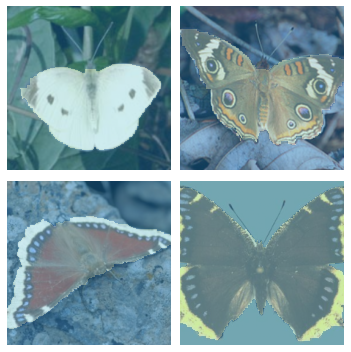

In [ ]:
# Show some images from the validation set (mask superimposed on image), as an example


In [ ]:
# Define the accuracy metric


In [ ]:
metrics=acc

In [ ]:
# Define the "weight decay" (a form of regularization that is, in some sense, equivalent to l2-regularization)


In [ ]:
# Load the fast.ai unet object


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,acc,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


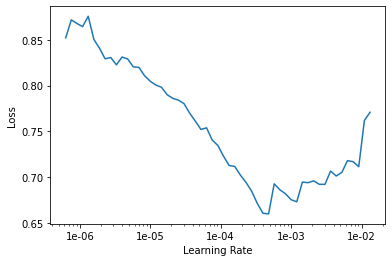

In [ ]:
# Do a search to find a good learning rate


In [ ]:
# Define the learning rate


In [ ]:
# Perform training for 15 epochs
# This training function first increases, then decreases the learning rate.
# The "increasing" phase takes "pct_start" of the training.


epoch,train_loss,valid_loss,acc,time
0,0.218356,0.138012,0.945849,00:22
1,0.175179,0.180322,0.924070,00:22
2,0.106981,0.073544,0.971236,00:22
3,0.093239,0.063657,0.976164,00:22
4,0.077480,0.049638,0.980576,00:22
5,0.073676,0.047348,0.981723,00:22
6,0.057469,0.047317,0.982560,00:22
7,0.057973,0.046029,0.983002,00:22
8,0.050004,0.043899,0.984071,00:22
9,0.042174,0.035864,0.986491,00:22


In [ ]:
# A predict function that takes care of resizing.
# Returns the predicted mask of the same size as the input image
def predict(learn,img):
  img2 = deepcopy(img)
  img2.resize(learn.data.train_ds[0][0].shape)
  pred = ImageSegment(learn.predict(img2)[1]*1.)
  pred.resize(img.shape)

  return pred

True


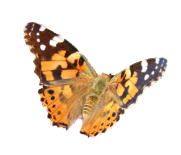

In [ ]:
# Compare an image masked with the true mask...
print("True")
masked(img,mask).show()

Predicted


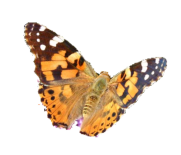

In [ ]:
# ...to the same image masked with the predicted mask
print("Predicted")
masked(img,predict(learn,img)).show()

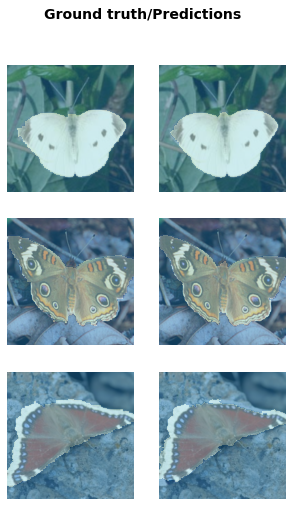

In [ ]:
# Show some other example predictions, with the mask superimposed
# (truth: left, prediction: right)


In [ ]:
# Save a checkpoint file


In [ ]:
# Resume at the checkpoint


In [ ]:
# Unfreeze the weights of the convolutional layers for fine tuning


In [ ]:
# Creating a slice of learning rate values applies a different learning rate to different layers


In [ ]:
# Perform the fine tuning


epoch,train_loss,valid_loss,acc,time
0,0.026476,0.028135,0.989277,00:23
1,0.027562,0.027813,0.989182,00:23
2,0.024474,0.027108,0.989727,00:23
3,0.023696,0.026749,0.989735,00:23
4,0.024461,0.026107,0.989978,00:23


In [ ]:
# Save another checkpoint file


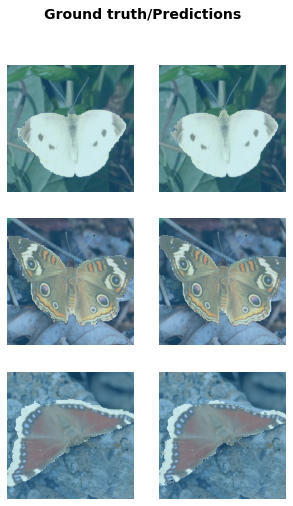

In [ ]:
# Export the trained model (saves as 'export.pkl' in the images directory)


In [ ]:
!ls leedsbutterfly/images/*pkl

leedsbutterfly/images/export.pkl
